# Create a simple NN with Keras

In [118]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

df.head()

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [119]:
df.columns

Index(['timespreg', 'gluctol', 'diaspb', 'triceps', 'insulin', 'massindex',
       'pedigree', 'age', 'target'],
      dtype='object')

In [120]:
#Print class frequencies through pandas 
print(df.groupby('target').size())

target
0    500
1    268
dtype: int64


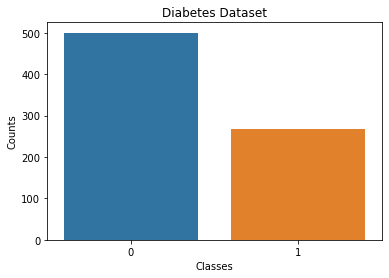

In [121]:
#Bar plot for the target variable
%matplotlib inline
import seaborn as sns #https://seaborn.pydata.org/
import matplotlib.pyplot as plt #https://matplotlib.org/

sns.countplot(x="target", data=df)
plt.title("Diabetes Dataset")
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.show()

array([[<AxesSubplot:title={'center':'timespreg'}>,
        <AxesSubplot:title={'center':'gluctol'}>,
        <AxesSubplot:title={'center':'diaspb'}>],
       [<AxesSubplot:title={'center':'triceps'}>,
        <AxesSubplot:title={'center':'insulin'}>,
        <AxesSubplot:title={'center':'massindex'}>],
       [<AxesSubplot:title={'center':'pedigree'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

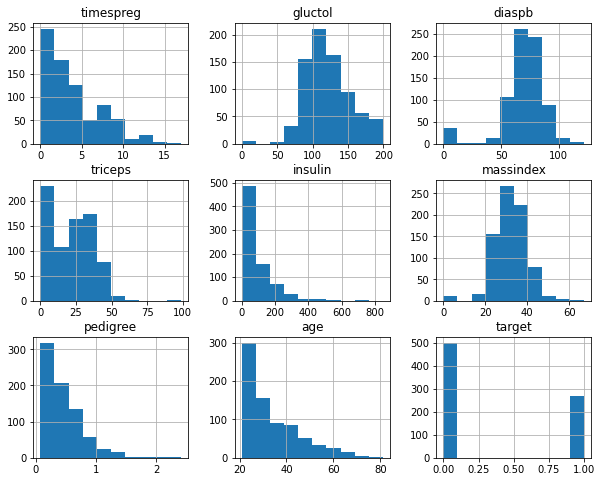

In [122]:
df.hist(figsize=(10,8))

In [123]:
# slicing the dataframe EXPL_VARs/TARGET
import numpy as np
df = df.values
x=df[:,0:-1] 
y=df[:,-1]

print(x.shape)

(768, 8)


In [124]:
print(y.shape)

(768,)


In [125]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size =0.3, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability
print(x_train.shape)
print(x_test.shape)

(537, 8)
(231, 8)


## Create a NN model with Keras

In [126]:
# Install a conda package in the current Jupyter kernel
#import sys
#!conda install --yes --prefix {sys.prefix} keras tensorflow

In [127]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers

np.random.seed(123)

model = Sequential()
model.add(Dense(256, input_dim=8, activation='sigmoid'))
model.add(Dropout(0.7))
model.add(Dense(1, activation='sigmoid'))

## Train the model and print a summary representation of the model

In [116]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               2304      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________
None


# Fit the model

In [117]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=400,
                    batch_size=64)

Epoch 1/400
7/7 [==============================] - 3s 206ms/step - loss: 0.8744 - accuracy: 0.5648 - val_loss: 0.7215 - val_accuracy: 0.6111
Epoch 2/400
7/7 [==============================] - 0s 62ms/step - loss: 0.8231 - accuracy: 0.5718 - val_loss: 0.7259 - val_accuracy: 0.6111
Epoch 3/400
7/7 [==============================] - 0s 59ms/step - loss: 0.8320 - accuracy: 0.5855 - val_loss: 0.7476 - val_accuracy: 0.6204
Epoch 4/400
7/7 [==============================] - 0s 53ms/step - loss: 0.7455 - accuracy: 0.6447 - val_loss: 0.7429 - val_accuracy: 0.6204
Epoch 5/400
7/7 [==============================] - 0s 34ms/step - loss: 0.6959 - accuracy: 0.6607 - val_loss: 0.7408 - val_accuracy: 0.6204
Epoch 6/400
7/7 [==============================] - 0s 61ms/step - loss: 0.7708 - accuracy: 0.5792 - val_loss: 0.7566 - val_accuracy: 0.6204
Epoch 7/400
7/7 [==============================] - 0s 58ms/step - loss: 0.7782 - accuracy: 0.5994 - val_loss: 0.8006 - val_accuracy: 0.6204
Epoch 8/400
7/7 [==

7/7 [==============================] - 0s 33ms/step - loss: 0.5025 - accuracy: 0.7568 - val_loss: 0.8344 - val_accuracy: 0.5556
Epoch 118/400
7/7 [==============================] - 0s 44ms/step - loss: 0.4817 - accuracy: 0.7370 - val_loss: 0.8360 - val_accuracy: 0.6111
Epoch 119/400
7/7 [==============================] - 0s 38ms/step - loss: 0.4485 - accuracy: 0.7938 - val_loss: 0.8257 - val_accuracy: 0.5370
Epoch 120/400
7/7 [==============================] - 0s 36ms/step - loss: 0.5140 - accuracy: 0.7656 - val_loss: 0.8309 - val_accuracy: 0.5370
Epoch 121/400
7/7 [==============================] - 0s 26ms/step - loss: 0.4698 - accuracy: 0.7852 - val_loss: 0.8277 - val_accuracy: 0.5278
Epoch 122/400
7/7 [==============================] - 0s 36ms/step - loss: 0.4811 - accuracy: 0.7747 - val_loss: 0.8391 - val_accuracy: 0.5556
Epoch 123/400
7/7 [==============================] - 0s 27ms/step - loss: 0.4821 - accuracy: 0.7507 - val_loss: 0.8408 - val_accuracy: 0.5556
Epoch 124/400
7/7 [=

Epoch 175/400
7/7 [==============================] - 0s 38ms/step - loss: 0.4691 - accuracy: 0.7344 - val_loss: 0.8449 - val_accuracy: 0.5926
Epoch 176/400
7/7 [==============================] - 0s 40ms/step - loss: 0.4450 - accuracy: 0.7772 - val_loss: 0.8536 - val_accuracy: 0.6111
Epoch 177/400
7/7 [==============================] - 0s 35ms/step - loss: 0.4721 - accuracy: 0.7952 - val_loss: 0.8433 - val_accuracy: 0.6111
Epoch 178/400
7/7 [==============================] - 0s 48ms/step - loss: 0.4671 - accuracy: 0.7773 - val_loss: 0.8396 - val_accuracy: 0.5741
Epoch 179/400
7/7 [==============================] - 0s 45ms/step - loss: 0.5094 - accuracy: 0.7446 - val_loss: 0.8390 - val_accuracy: 0.5926
Epoch 180/400
7/7 [==============================] - 0s 37ms/step - loss: 0.4807 - accuracy: 0.7438 - val_loss: 0.8516 - val_accuracy: 0.5556
Epoch 181/400
7/7 [==============================] - 0s 28ms/step - loss: 0.4924 - accuracy: 0.7681 - val_loss: 0.8469 - val_accuracy: 0.5926
Epoch 

Epoch 233/400
7/7 [==============================] - 0s 27ms/step - loss: 0.4626 - accuracy: 0.7750 - val_loss: 0.8658 - val_accuracy: 0.5741
Epoch 234/400
7/7 [==============================] - 0s 30ms/step - loss: 0.4297 - accuracy: 0.8144 - val_loss: 0.8494 - val_accuracy: 0.5926
Epoch 235/400
7/7 [==============================] - 0s 35ms/step - loss: 0.4748 - accuracy: 0.7685 - val_loss: 0.8859 - val_accuracy: 0.5741
Epoch 236/400
7/7 [==============================] - 0s 45ms/step - loss: 0.4604 - accuracy: 0.7727 - val_loss: 0.8734 - val_accuracy: 0.5926
Epoch 237/400
7/7 [==============================] - 0s 45ms/step - loss: 0.4686 - accuracy: 0.7787 - val_loss: 0.8649 - val_accuracy: 0.6019
Epoch 238/400
7/7 [==============================] - 0s 29ms/step - loss: 0.4711 - accuracy: 0.7747 - val_loss: 0.8621 - val_accuracy: 0.5741
Epoch 239/400
7/7 [==============================] - 0s 41ms/step - loss: 0.4562 - accuracy: 0.8125 - val_loss: 0.8752 - val_accuracy: 0.5926
Epoch 

Epoch 291/400
7/7 [==============================] - 0s 20ms/step - loss: 0.4552 - accuracy: 0.8049 - val_loss: 0.8907 - val_accuracy: 0.6204
Epoch 292/400
7/7 [==============================] - 0s 21ms/step - loss: 0.4416 - accuracy: 0.7937 - val_loss: 0.8748 - val_accuracy: 0.6019
Epoch 293/400
7/7 [==============================] - 0s 21ms/step - loss: 0.4647 - accuracy: 0.7762 - val_loss: 0.8955 - val_accuracy: 0.5833
Epoch 294/400
7/7 [==============================] - 0s 25ms/step - loss: 0.4603 - accuracy: 0.7830 - val_loss: 0.8791 - val_accuracy: 0.5833
Epoch 295/400
7/7 [==============================] - 0s 28ms/step - loss: 0.4898 - accuracy: 0.7645 - val_loss: 0.8897 - val_accuracy: 0.6111
Epoch 296/400
7/7 [==============================] - 0s 27ms/step - loss: 0.4301 - accuracy: 0.7967 - val_loss: 0.8843 - val_accuracy: 0.5833
Epoch 297/400
7/7 [==============================] - 0s 23ms/step - loss: 0.4445 - accuracy: 0.8127 - val_loss: 0.8757 - val_accuracy: 0.5741
Epoch 

Epoch 349/400
7/7 [==============================] - 0s 19ms/step - loss: 0.5142 - accuracy: 0.7470 - val_loss: 0.9180 - val_accuracy: 0.6204
Epoch 350/400
7/7 [==============================] - 0s 19ms/step - loss: 0.4442 - accuracy: 0.7829 - val_loss: 0.8938 - val_accuracy: 0.6111
Epoch 351/400
7/7 [==============================] - 0s 20ms/step - loss: 0.4647 - accuracy: 0.7735 - val_loss: 0.8753 - val_accuracy: 0.6019
Epoch 352/400
7/7 [==============================] - 0s 32ms/step - loss: 0.4533 - accuracy: 0.7861 - val_loss: 0.8822 - val_accuracy: 0.5833
Epoch 353/400
7/7 [==============================] - 0s 34ms/step - loss: 0.4468 - accuracy: 0.7701 - val_loss: 0.8827 - val_accuracy: 0.5648
Epoch 354/400
7/7 [==============================] - 0s 35ms/step - loss: 0.4513 - accuracy: 0.7859 - val_loss: 0.8894 - val_accuracy: 0.5833
Epoch 355/400
7/7 [==============================] - 0s 34ms/step - loss: 0.4898 - accuracy: 0.7466 - val_loss: 0.8954 - val_accuracy: 0.6019
Epoch 

# Evaluate the model and print its loss and accuracy score

In [100]:
score = model.evaluate(x_test, y_test)
print(score)

8/8 [==============================] - 0s 6ms/step - loss: 0.6681 - accuracy: 0.7273
[0.6681328415870667, 0.7272727489471436]


In [101]:
y_pred_prob=model.predict(x_test)
y_pred_prob

array([[1.38019919e-02],
       [5.24967909e-04],
       [1.04147196e-02],
       [1.96823031e-01],
       [8.29660594e-01],
       [2.13280022e-02],
       [5.59682548e-02],
       [1.83352828e-03],
       [4.63619947e-01],
       [5.49604893e-02],
       [9.71555710e-04],
       [6.40906990e-02],
       [7.67440498e-02],
       [9.51391459e-03],
       [7.88776934e-01],
       [3.74034047e-03],
       [1.25170410e-01],
       [5.08851409e-02],
       [4.63652164e-01],
       [1.72532797e-02],
       [8.35419178e-01],
       [6.22739792e-02],
       [7.58960605e-01],
       [1.77299917e-01],
       [1.52933896e-01],
       [8.69746566e-01],
       [3.91267955e-01],
       [1.15326643e-02],
       [2.18195438e-01],
       [6.77711666e-02],
       [5.92615962e-01],
       [5.96670091e-01],
       [1.24567747e-03],
       [1.75696909e-02],
       [4.20908570e-01],
       [1.65164471e-04],
       [6.26152754e-03],
       [7.68999577e-01],
       [6.33822262e-01],
       [5.78809023e-01],


              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80       150
         1.0       0.64      0.53      0.58        81

    accuracy                           0.73       231
   macro avg       0.71      0.69      0.69       231
weighted avg       0.72      0.73      0.72       231



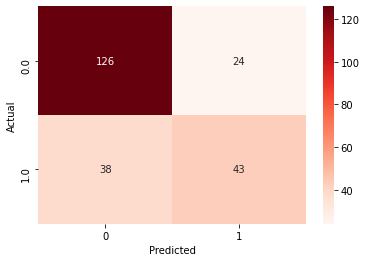

In [102]:
y_pred=np.where(y_pred_prob > .45, 1,0).flatten()

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sn
import pandas as pd

print(classification_report(y_test, y_pred))

confusion_matrix = pd.crosstab( y_test,y_pred,rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,fmt='g',cmap="Reds")
plt.show()

# Plot model training history

In [103]:
history.history

{'loss': [0.5417077541351318,
  0.5721337199211121,
  0.574934184551239,
  0.541423499584198,
  0.5096346735954285,
  0.5730071663856506,
  0.5248365998268127,
  0.5264116525650024,
  0.537070095539093,
  0.5736368298530579,
  0.5712742805480957,
  0.5842914581298828,
  0.5862830281257629,
  0.5510655045509338,
  0.5658387541770935,
  0.592210054397583,
  0.5583520531654358,
  0.529590368270874,
  0.5804619789123535,
  0.597170889377594,
  0.579852283000946,
  0.5861034393310547,
  0.5238920450210571,
  0.5393186807632446,
  0.5482404828071594,
  0.536840558052063,
  0.561302661895752,
  0.5414639115333557,
  0.5004299879074097,
  0.5647636651992798,
  0.56058669090271,
  0.558341920375824,
  0.5659360885620117,
  0.52877277135849,
  0.5699872970581055,
  0.5627806186676025,
  0.5375393033027649,
  0.5664300918579102,
  0.5785367488861084,
  0.6002724170684814,
  0.5412328839302063,
  0.5497511029243469,
  0.562908947467804,
  0.6041516065597534,
  0.5127952694892883,
  0.5257709026336

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


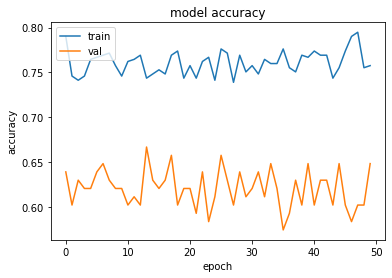

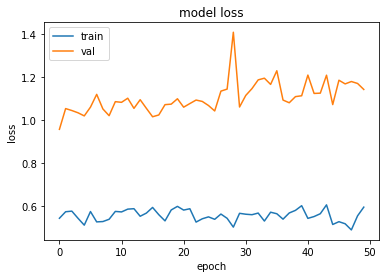

In [104]:
import matplotlib.pyplot as plt

%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()